<a href="https://colab.research.google.com/github/Anantbir-S/AER850_Project2/blob/main/Final_Code_for_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.
Epoch 1/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 128s 479ms/step - accuracy: 0.5430 - loss: 1.0784 - val_accuracy: 0.3944 - val_loss: 1.3432
Epoch 2/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 115s 459ms/step - accuracy: 0.6654 - loss: 0.7602 - val_accuracy: 0.6497 - val_loss: 0.7689
Epoch 3/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 114s 457ms/step - accuracy: 0.6996 - loss: 0.6790 - val_accuracy: 0.7146 - val_loss: 0.6421
Epoch 4/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 114s 457ms/step - accuracy: 0.7244 - loss: 0.6332 - val_accuracy: 0.7146 - val_loss: 0.6854
Epoch 5/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 114s 456ms/step - accuracy: 0.7311 - loss: 0.6258 - val_accuracy: 0.7587 - val_loss: 0.5649
Epoch 6/25
243/243 ━━━━━━━━━━━━━━━━━━━━ 115s 458ms/step - accuracy: 0.7525 - loss: 0.5610 - val_accuracy: 0.7355 - val_loss: 0.6

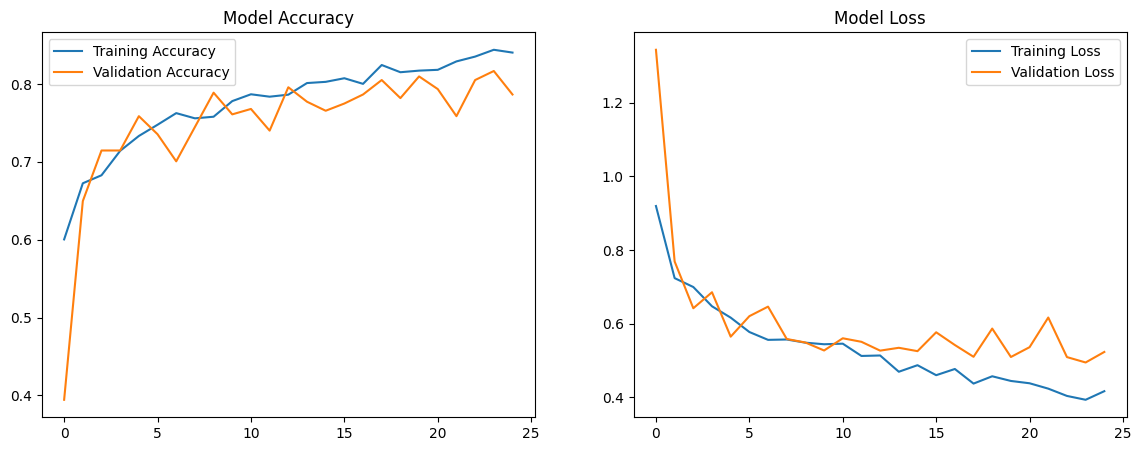

In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, mixed_precision
import matplotlib.pyplot as plt
from google.colab import drive

# Enable mixed precision for faster computation on compatible GPUs
mixed_precision.set_global_policy('mixed_float16')

# Mount Google Drive
drive.mount('/content/drive')

# Paths for Google Colab
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Image dimensions and batch size
input_image_shape = (500, 500, 3)
img_size = (500, 500)
batch_size = 8

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=28,
    horizontal_flip=True
)

# Rescaling for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

# Data Generators with consistent target size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Neural Network Architecture without Dropout
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_image_shape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

            layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),

    layers.Dense(3, activation='softmax', dtype='float32')  # Specify float32 for final layer with mixed precision
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for Early Stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=valid_generator,
    callbacks=callbacks
)

# Model Evaluation - Plot Accuracy and Loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

model.save('/content/drive/MyDrive/Project 2 Data/modeltest112.keras')

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 54 variables whereas the saved optimizer has 58 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


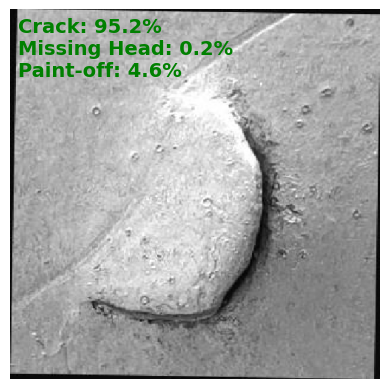

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


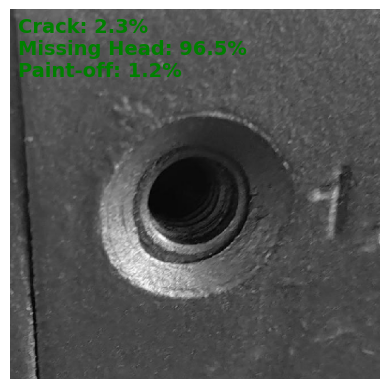

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


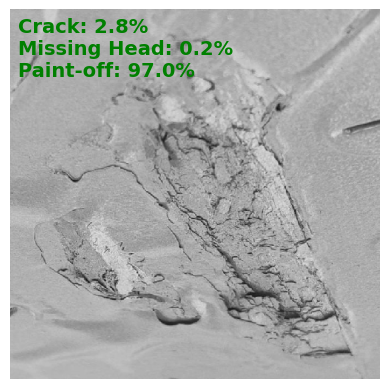

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model from Google Drive
model_path = '/content/drive/MyDrive/Project 2 Data/modeltest112.keras'
model = tf.keras.models.load_model(model_path)

# Define test image paths on Google Drive
base_dir = '/content/drive/MyDrive/Project 2 Data/Data'
test_dir = os.path.join(base_dir, 'test')
test_images = {
    'crack': os.path.join(test_dir, 'crack', 'test_crack.jpg'),
    'missing_head': os.path.join(test_dir, 'missing-head', 'test_missinghead.jpg'),
    'paint_off': os.path.join(test_dir, 'paint-off', 'test_paintoff.jpg')
}

# Class labels as per your model's training
class_labels = ['Crack', 'Missing Head', 'Paint-off']

# Preprocess and predict on each test image
for defect, img_path in test_images.items():
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(500, 500))
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)[0]  # Get prediction array
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    # Display the image and prediction
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

    # Add green text overlay with all class predictions and confidence scores
    for i, (label, score) in enumerate(zip(class_labels, predictions)):
        plt.text(
            10, 30 + i * 30,  # Position: slightly lower for each label
            f"{label}: {score * 100:.1f}%",
            color='green',
            fontsize=14,
            weight='bold'
        )

    plt.show()
